<a href="https://colab.research.google.com/github/SurawutK/Kaggle-Projects/blob/main/titanic-survival-prediction/titanic_binary_classification_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

title: "Titanic - Binary Classification Problem"
author: "Surawut Kittikaiwan"
date: "2024-04-10"

---

# 1. Frame the problem

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
The objective of this challenge is to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Data Extraction

For this problem, Two similar datasets that include passenger information like name, age, gender, socio-economic class, etc are provided. One dataset is titled `train.csv` and the other is titled `test.csv`.

* `train.csv` will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth” or "true lable".
* `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger.

In [2]:
train_set = pd.read_csv('https://github.com/SurawutK/Kaggle-Projects/raw/refs/heads/main/datasets/titanic-datasets/train.csv')

In [3]:
test_set_final = pd.read_csv('https://github.com/SurawutK/Kaggle-Projects/raw/refs/heads/main/datasets/titanic-datasets/test.csv')

## 2-1 Take a Quick Look at the Data Structure

In [4]:
# Training set
display(train_set.head())
print(f'Training set consist of {train_set.shape[0]} instances with {train_set.shape[1]-1} input features, and 1 label.')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Training set consist of 891 instances with 11 input features, and 1 label.


In [5]:
# Test set
display(test_set_final.head())
print(f'Test set consist of {test_set_final.shape[0]} instances with {test_set_final.shape[1]} input features.')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Test set consist of 418 instances with 11 input features.


In [6]:
# data dictionary
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Look how many districts belong to each category in 'Sex' column
train_set['Sex'].value_counts(normalize=True)

,proportion
Sex,
male,0.647587
female,0.352413


In [8]:
# Look on number of passengers who survived and not survived
train_set['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [9]:
# Look at others fields
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


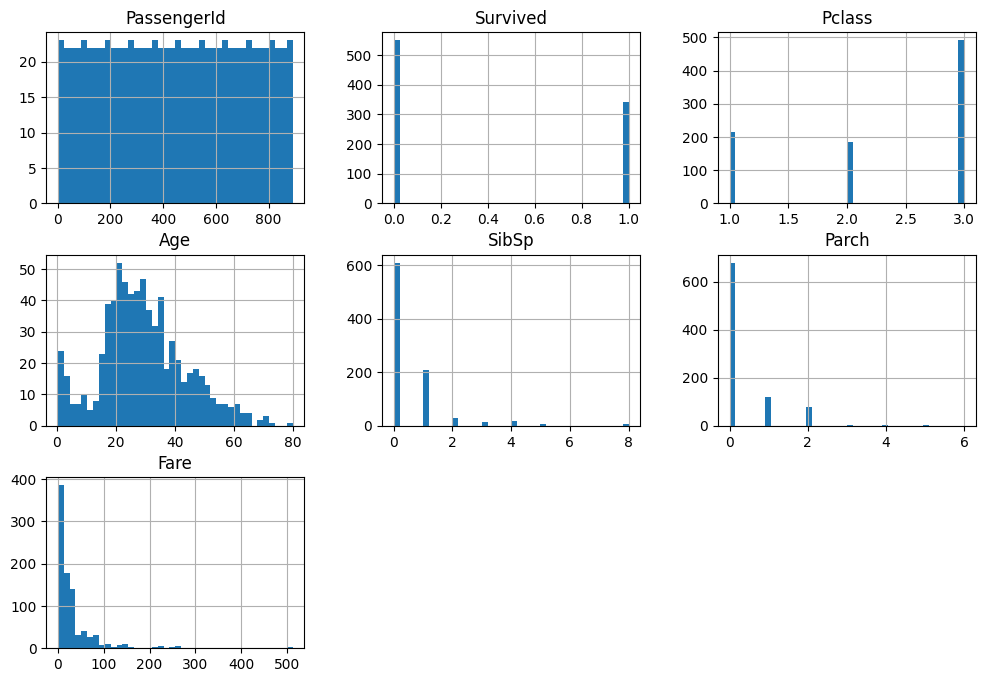

In [10]:
# Plot histrogram for each numerical attribute to get a feel of the type of data we are dealing with
train_set.hist(bins=40, figsize=(12,8))
plt.show()

## 2-2 Create a Test Set

To avoid sampling bias and ensure that test set is representative of the ovarall population, stratified sampling will be used for splitting training data set into `train set` and `test set`. The population is divided into homogeneous subgroups called strata, and the right number of instances are sampled from each stratum.

For this dataset, I want to ensure that the test set is representative of the various categories of ages in the whole dataset.

In [11]:
# Check if the 'Age' feature in 'train_set' has any null values
train_set[train_set['Age'].isna()]
print(f"Number of null values in the Age column = {np.sum(train_set['Age'].isna())}")

Number of null values in the Age column = 177


The`Age` feature has 177 null values. For features fed to machine learning algorithm cannot contain null, therefore I should impute the missing values with some values that represent the whole population in dataset such as median value.

In [12]:
# take a look at the median age of passengers by ticket class
train_set.groupby('Pclass')['Age'].median()

,Age
Pclass,
1,37.0
2,29.0
3,24.0


In [13]:
# Use pandas transform method to create a serie all training instances with the median of age by their ticket classes.
train_set.groupby('Pclass')['Age'].transform('median')

,Age
0,24.0
1,37.0
2,24.0
3,37.0
4,24.0
...,...
886,29.0
887,37.0
888,24.0
889,37.0


In [14]:
# fill those representative value in 'Age' column where values are missing
age_median = train_set.groupby('Pclass')['Age'].transform('median')
train_set.fillna({'Age':age_median}, inplace=True)

After filling in missing values in `Age` feature, since the age is a continuous numerical attribute , I first need to create an age category attribute with five categories (labeled from 1 to 5); category 1 ranges from 0-15 years olds, category 2 from 15-30 years olds, and so on.

In [15]:
# Create Age_cat attribute using padas.cut() method
train_set['Age_cat'] = pd.cut(train_set['Age'], bins=[0., 15., 30., 45., 60., np.inf], precision=1, labels=[1, 2, 3, 4, 5])
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3


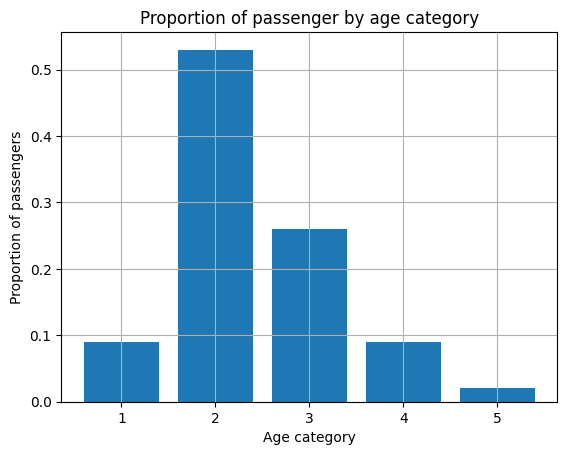

In [16]:
# Create visualization for age categories
age_cat_prop = train_set['Age_cat'].value_counts(sort=False, normalize=True).to_frame().reset_index().round(2)
plt.bar(data=age_cat_prop, x='Age_cat', height='proportion')
plt.xlabel('Age category')
plt.ylabel('Proportion of passengers')
plt.title('Proportion of passenger by age category')
plt.grid()
plt.show()

Uitlize train_test_split function from sklearn.model_selection package to do stratified sampling based on the age category. Splitting dataset into a training set and test set.

In [17]:
# Splitting the dataset in to train set and test set using stratifird sampling
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(
    train_set, test_size=0.2, stratify=train_set['Age_cat'], random_state=42)

In [18]:
# Check proportion of passengers by age category
strat_test_set['Age_cat'].value_counts(normalize=True, sort=False)

,proportion
Age_cat,
1,0.094972
2,0.530726
3,0.262570
4,0.089385
5,0.022346


The test set generated using stratified sampling has age category proportions almost identical to those in the full dataset, whereas the test set generated using purely random sampling is skewed.

In [19]:
# drop 'Age_cat' column, reverting the data back to its original state
for set_ in (strat_train_set, strat_test_set):
    set_.drop(columns=['Age_cat'], inplace=True)

# 3. Explore and Visualize the Data to Gain Insights

In [20]:
# To prevent change in training set, copy the strat_train_set and assign to new variable
titanic = strat_train_set.copy()

In [21]:
# Explore first 5 rows
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S
206,207,0,3,"Backstrom, Mr. Karl Alfred",male,32.0,1,0,3101278,15.8500,NaN,S
188,189,0,3,"Bourke, Mr. John",male,40.0,1,1,364849,15.5000,NaN,Q
639,640,0,3,"Thorneycroft, Mr. Percival",male,24.0,1,0,376564,16.1000,NaN,S
156,157,1,3,"Gilnagh, Miss. Katherine ""Katie""",female,16.0,0,0,35851,7.7333,NaN,Q


In [22]:
# Data dictionary
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 62 to 825
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        166 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


The dataset consists of 12 attributes:
- 4 `categorical` attributes:
  * 1 target variable: *Survied*
  * 3 categorical features: *Pclass*, *Sex*, *Embarked*
- 5 Numeric features:
  * 3 `int`: *PassengerId*, *SibSp*, *Parch*
  * 2 `float`: *Age*, *Fare*
- 3 `string` features:
  * *Name*, *Ticket*, *Cabin*

In [23]:
# Look at average age of passengers who survived and not survived
titanic.groupby('Survived')['Age'].mean().round(1)

,Age
Survived,
0,29.4
1,28.4


## 3-1 Visualizing Data

In [24]:
# Define a function for plotting two features and their classes
def plot_data(X, y, pos_label="y=1", neg_label="y=0", s=50, loc='best'):
    """ plots logistic data with two axis """
    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0

    # Plot examples
    plt.scatter(X[pos, 0], X[pos, 1], marker='x', s=s, c = 'red', label=pos_label)
    plt.scatter(X[neg, 0], X[neg, 1], marker='o', s=s, label=neg_label, facecolors='none', edgecolors='#0096ff', lw=2)
    plt.legend(loc=loc)

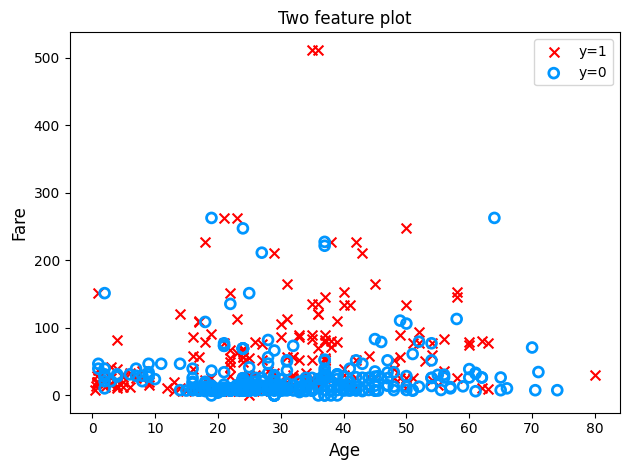

In [25]:
# Plotting two features 'Age' and 'Fare' and their class labels
X = np.array(titanic[['Age', 'Fare']])
y = np.array(titanic['Survived'])
plot_data(X, y)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.title('Two feature plot')
plt.legend()
plt.tight_layout()
plt.show()

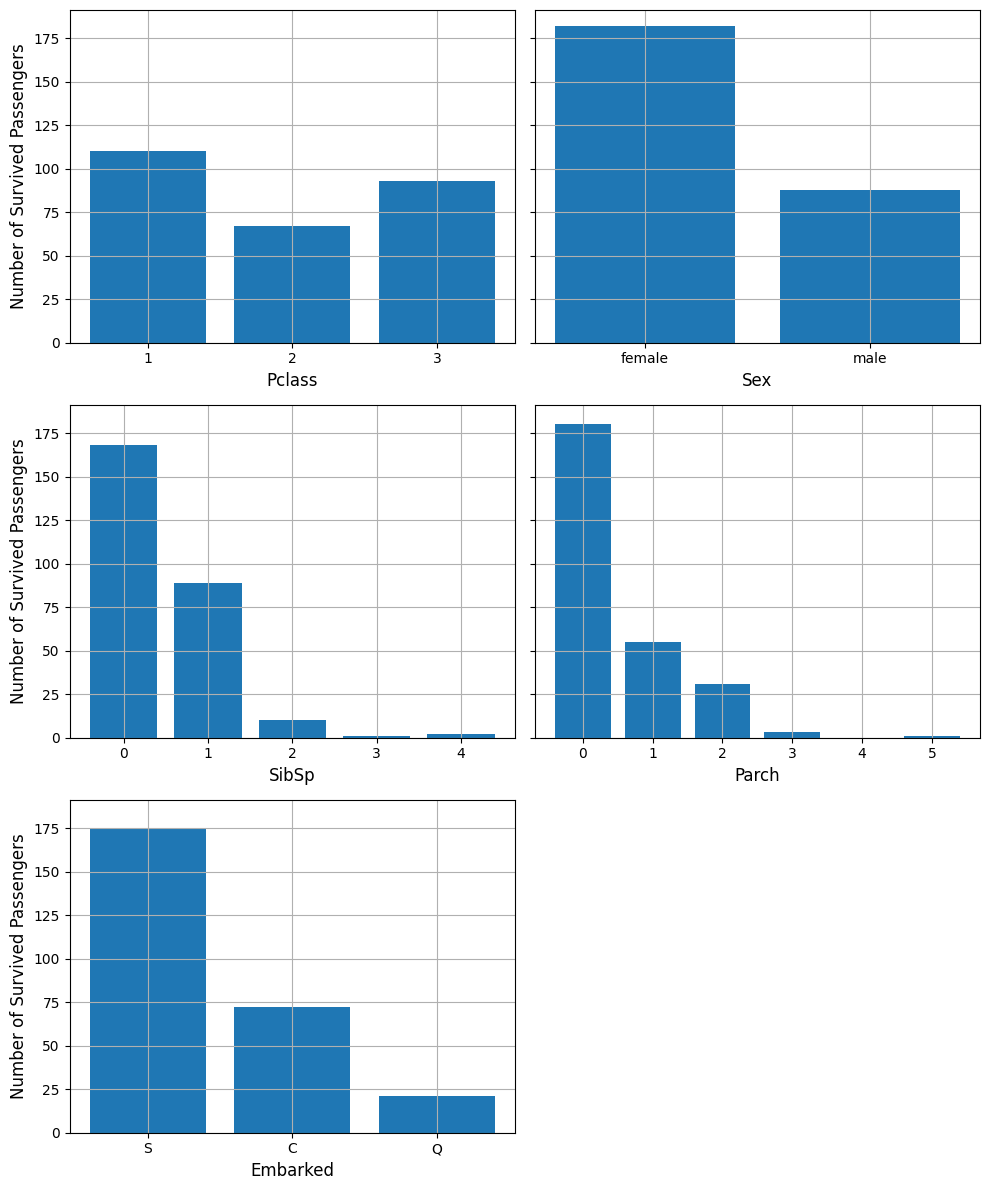

In [26]:
# Plotting Number of survived passengers vs various features

survived = titanic[titanic['Survived'] == 1].copy()
fig, ax = plt.subplots(3, 2, figsize=(10,12), sharey=True)

# Plot 1, Number of survived passengers vs Pclass
data = survived['Pclass'].value_counts()
ax[0,0].bar(x=data.index, height=data)
ax[0,0].set_xticks([1,2,3])
ax[0,0].set_xlabel('Pclass', fontsize=12)
ax[0,0].set_ylabel('Number of Survived Passengers', fontsize=12)
ax[0,0].grid()

# Plot 2, Number of survived passengers vs Sex
data = survived['Sex'].value_counts()
ax[0,1].bar(x=data.index, height=data)
ax[0,1].set_xlabel('Sex', fontsize=12)
ax[0,1].grid()

# Plot 3, Number of survived passengers vs SibSp
data = survived['SibSp'].value_counts()
ax[1,0].bar(x=data.index, height=data)
ax[1,0].set_xlabel('SibSp', fontsize=12)
ax[1,0].set_ylabel('Number of Survived Passengers', fontsize=12)
ax[1,0].grid()

# Plot 4, Number of survived passengers vs Parch
data = survived['Parch'].value_counts()
ax[1,1].bar(x=data.index, height=data)
ax[1,1].set_xlabel('Parch', fontsize=12)
ax[1,1].grid()

# Plot 5, Number of survived passengers vs Embarked
data = survived['Embarked'].value_counts()
ax[2,0].bar(x=data.index, height=data)
ax[2,0].set_xlabel('Embarked', fontsize=12)
ax[2,0].set_ylabel('Number of Survived Passengers', fontsize=12)
ax[2,0].grid()

ax[2,1].remove()
plt.tight_layout()
plt.show()

## 3-2 Look for Correlations

In [27]:
# correlation matrix of all numeric attributes
corr_matrix = titanic.corr(numeric_only=True)
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.008469,-0.020672,0.027089,-0.074396,-0.005050,-0.004371
Survived,0.008469,1.000000,-0.358467,-0.035985,-0.049616,0.076315,0.259670
Pclass,-0.020672,-0.358467,1.000000,-0.408691,0.088621,0.012188,-0.562805
Age,0.027089,-0.035985,-0.408691,1.000000,-0.234994,-0.148430,0.143832
SibSp,-0.074396,-0.049616,0.088621,-0.234994,1.000000,0.390764,0.155859
Parch,-0.005050,0.076315,0.012188,-0.148430,0.390764,1.000000,0.217979
Fare,-0.004371,0.259670,-0.562805,0.143832,0.155859,0.217979,1.000000


In [28]:
# correlation of Age attribute relative to others
corr_matrix['Age']

,Age
PassengerId,0.027089
Survived,-0.035985
Pclass,-0.408691
Age,1.000000
SibSp,-0.234994
Parch,-0.148430
Fare,0.143832


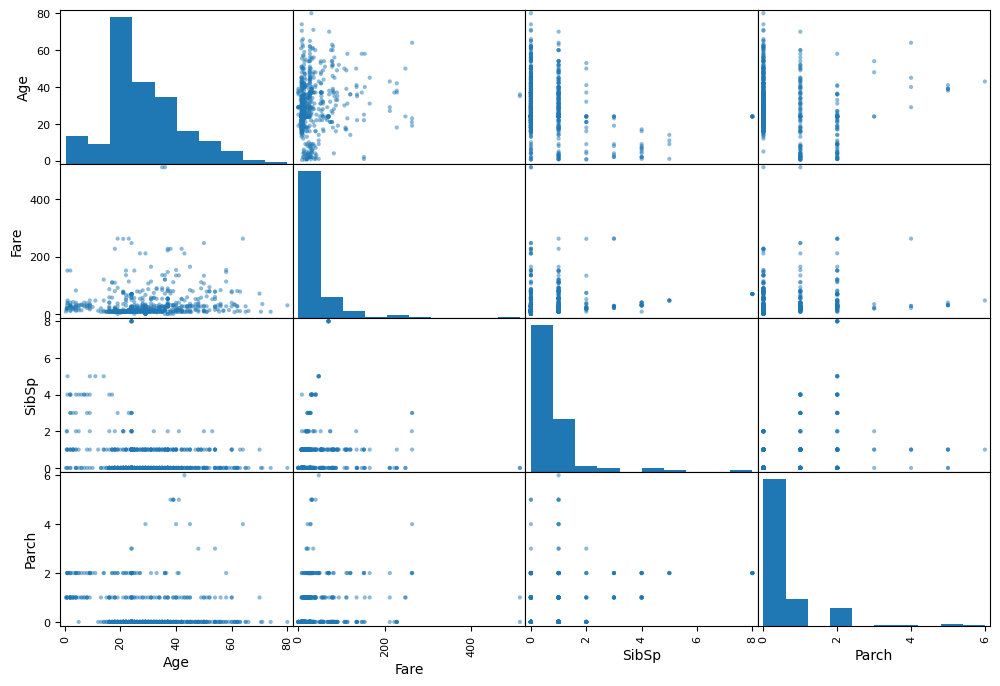

In [29]:
# Scatter matrix: Create the scatter plots between all numeric attributes
from pandas.plotting import scatter_matrix

attributes = ['Age', 'Fare', 'SibSp', 'Parch']
scatter_matrix(titanic[attributes], figsize=(12,8))
plt.show()

# 4. Data Preparation

In [30]:
# Seperate the fetures and the labels, and create a copy of training set
titanic = strat_train_set.drop(columns='Survived')
titanic_labels = strat_train_set['Survived'].copy()

## 4-1 Data Cleaning

### *Missing values*

In [31]:
# Explore the attributes which contain missing values
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 62 to 825
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          712 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        166 non-null    object 
 10  Embarked     710 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


In [32]:
# Drop all the columns that have missing values exceed 70% of their instances
min_non_na = int(0.3*titanic.shape[0])
titanic.dropna(axis='columns', thresh=min_non_na, inplace=True)

In [33]:
# Seperate dataframe into sub-dataframes by data type
titanic_int_object = titanic.select_dtypes(include=['int', 'object'])
titanic_float = titanic.select_dtypes(include=['float'])

In [34]:
# Using SimpleImputer transformer to impute missing values in different features
from sklearn.impute import SimpleImputer

int_object_imputer = SimpleImputer(strategy='most_frequent')
float_imputer = SimpleImputer(strategy='median')

In [35]:
# Fiting the transformer
int_object_imputer.fit(titanic_int_object)
float_imputer.fit(titanic_float)

SimpleImputer(strategy='median')

In [36]:
# Look at what transformer has learned
print(f'''Features name:
{int_object_imputer.feature_names_in_}

Statistics:
{int_object_imputer.statistics_}''')

Features name:
['PassengerId' 'Pclass' 'Name' 'Sex' 'SibSp' 'Parch' 'Ticket' 'Embarked']

Statistics:
[1 3 'Abbing, Mr. Anthony' 'male' 0 0 'CA. 2343' 'S']


In [37]:
# Look at what transformer has learned
print(f'''Features name:
{float_imputer.feature_names_in_}

Statistics:
{float_imputer.statistics_}''')

Features name:
['Age' 'Fare']

Statistics:
[26.     14.4583]


In [38]:
# Transform the features
X_1 = int_object_imputer.transform(titanic_int_object)
X_2 = float_imputer.transform(titanic_float)

In [39]:
# Combine the transformed features together into the dataframe
X = np.hstack([X_1, X_2])
columns = np.hstack([int_object_imputer.feature_names_in_, float_imputer.feature_names_in_])
titanic_tr = pd.DataFrame(X, columns=columns, index=titanic.index)
display(titanic_tr.head())

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked,Age,Fare
62,63,1,"Harris, Mr. Henry Birkhardt",male,1,0,36973,S,45.0,83.475
206,207,3,"Backstrom, Mr. Karl Alfred",male,1,0,3101278,S,32.0,15.85
188,189,3,"Bourke, Mr. John",male,1,1,364849,Q,40.0,15.5
639,640,3,"Thorneycroft, Mr. Percival",male,1,0,376564,S,24.0,16.1
156,157,3,"Gilnagh, Miss. Katherine ""Katie""",female,0,0,35851,Q,16.0,7.7333


In [40]:
# Checking if the missing values were imputed
titanic_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 62 to 825
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  712 non-null    object
 1   Pclass       712 non-null    object
 2   Name         712 non-null    object
 3   Sex          712 non-null    object
 4   SibSp        712 non-null    object
 5   Parch        712 non-null    object
 6   Ticket       712 non-null    object
 7   Embarked     712 non-null    object
 8   Age          712 non-null    object
 9   Fare         712 non-null    object
dtypes: object(10)
memory usage: 61.2+ KB


### *Format Data Types*

In [41]:
# Formatting data type
titanic_tr = titanic_tr.astype(
{
    'PassengerId':'int',
    'Pclass':'category',
    'Name':'string',
    'Sex':'category',
    'SibSp':'int',
    'Parch':'int',
    'Ticket':'string',
    'Embarked':'category',
    'Age':'float',
    'Fare':'float'
})
titanic_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 62 to 825
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  712 non-null    int64   
 1   Pclass       712 non-null    category
 2   Name         712 non-null    string  
 3   Sex          712 non-null    category
 4   SibSp        712 non-null    int64   
 5   Parch        712 non-null    int64   
 6   Ticket       712 non-null    string  
 7   Embarked     712 non-null    category
 8   Age          712 non-null    float64 
 9   Fare         712 non-null    float64 
dtypes: category(3), float64(2), int64(3), string(2)
memory usage: 47.0 KB


### *Dropping Duplicates*

In [42]:
# Dropping duplicate rows (if found)
titanic_tr.drop_duplicates(inplace=True)

### *Remove Irrelevant Features*

In [43]:
# Removing irrelevant features
titanic_tr.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
titanic_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 62 to 825
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    712 non-null    category
 1   Sex       712 non-null    category
 2   SibSp     712 non-null    int64   
 3   Parch     712 non-null    int64   
 4   Embarked  712 non-null    category
 5   Age       712 non-null    float64 
 6   Fare      712 non-null    float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 30.3 KB


In [44]:
# Check the data frame
display(titanic_tr.head())

,Pclass,Sex,SibSp,Parch,Embarked,Age,Fare
62,1,male,1,0,S,45.0,83.4750
206,3,male,1,0,S,32.0,15.8500
188,3,male,1,1,Q,40.0,15.5000
639,3,male,1,0,S,24.0,16.1000
156,3,female,0,0,Q,16.0,7.7333


## 4-2 Feature Transformation

### *Feature Encoding*

In [45]:
# select only category features
titanic_cat = titanic_tr.select_dtypes(include=['category'])

In [46]:
# fit and transform the category features using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
titanic_cat_1hot = cat_encoder.fit_transform(titanic_cat)

In [47]:
# Display the result
display(titanic_cat_1hot.toarray())
print(f'\nShape after one-hot encoding: {titanic_cat_1hot.toarray().shape}')
print(f'\nFeatures name in:\n{cat_encoder.feature_names_in_}')
print(f'\nFeatures name out:\n{cat_encoder.get_feature_names_out()}')
print(f'\nCategories:\n{cat_encoder.categories_}')

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])


Shape after one-hot encoding: (712, 8)

Features name in:
['Pclass' 'Sex' 'Embarked']

Features name out:
['Pclass_1' 'Pclass_2' 'Pclass_3' 'Sex_female' 'Sex_male' 'Embarked_C'
 'Embarked_Q' 'Embarked_S']

Categories:
[array([1, 2, 3]), array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]


In [48]:
# Testing the transformer on test set. Noted that test set still remain unchanged.
cat_encoder.handle_unknown = 'ignore'
cat_encoder.transform(strat_test_set[['Pclass', 'Sex', 'Embarked']]).toarray()

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

### *Feature Scaling*

In [49]:
# Select only numeric features
titanic_num = titanic_tr.select_dtypes(include=[np.number])

In [50]:
# # fit and transform the numeric features using StandardScaler
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
titanic_num_std_scaled = std_scaler.fit_transform(titanic_num)

display(titanic_num_std_scaled)
print(std_scaler.get_feature_names_out())

array([[ 0.44323582, -0.47942728,  1.19186501,  1.05372238],
       [ 0.44323582, -0.47942728,  0.22184237, -0.33261781],
       [ 0.44323582,  0.70995328,  0.81877938, -0.33979295],
       ...,
       [-0.46885639, -0.47942728, -0.74818026, -0.442295  ],
       [-0.46885639, -0.47942728, -0.37509463, -0.50934773],
       [-0.46885639, -0.47942728, -0.37509463, -0.51507145]])

['SibSp' 'Parch' 'Age' 'Fare']


In [51]:
# Display the result
X = np.hstack([titanic_num_std_scaled, titanic_cat_1hot.toarray()])
columns = np.hstack([std_scaler.get_feature_names_out(),
                     cat_encoder.get_feature_names_out()])
titanic_tr = pd.DataFrame(X, columns=columns, index=titanic_tr.index)
display(titanic_tr.head())
print(f'\nShape: {titanic_tr.shape}')

,SibSp,Parch,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
62,0.443236,-0.479427,1.191865,1.053722,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
206,0.443236,-0.479427,0.221842,-0.332618,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
188,0.443236,0.709953,0.818779,-0.339793,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
639,0.443236,-0.479427,-0.375095,-0.327493,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
156,-0.468856,-0.479427,-0.972032,-0.499013,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0



Shape: (712, 12)


## 4-3 Construct Transformation Pipelines

In [52]:
# Making a single pipeline that will perform all the transformations I've experimented with up to now

from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn import set_config

cat_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

int_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    StandardScaler()
)

log_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    FunctionTransformer(np.log, feature_names_out='one-to-one'),
    StandardScaler()
)

cbrt_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    FunctionTransformer(np.cbrt, feature_names_out='one-to-one'),
    StandardScaler()
)

preprocessing = ColumnTransformer(
    [
        ('int', int_pipeline, ['SibSp', 'Parch']),
        ('log', log_pipeline, ['Age']),
        ('cbrt', cbrt_pipeline, ['Fare']),
        ('cat', cat_pipeline, ['Pclass', 'Sex', 'Embarked'])
    ]
,remainder='drop')

set_config(display='diagram')

In [53]:
# Here, I got the column transformation pipelines for preprocessing data
preprocessing

ColumnTransformer(transformers=[('int',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['SibSp', 'Parch']),
                                ('log',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<ufunc 'log'>)),
                                                 ('standardsc...
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<ufunc 'cbrt'>)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Fare']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Pclass', 'Sex', 'Embarked'])])

In [54]:
# Let's try preprocess the same data, but this time with the pipelines.
# Seperate the fetures and the labels, and create a copy of them.
titanic = strat_train_set.drop(columns='Survived')
titanic_labels = strat_train_set['Survived'].copy()

In [55]:
# fit and then transform 'titanic' training data
titanic_prepared = preprocessing.fit_transform(titanic)
titanic_prepared

array([[ 0.44323582, -0.47942728,  0.83663631, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.44323582, -0.47942728,  0.36583168, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.44323582,  0.70995328,  0.67398312, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.46885639, -0.47942728, -0.35405645, ...,  0.        ,
         0.        ,  1.        ],
       [-0.46885639, -0.47942728, -0.03144461, ...,  1.        ,
         0.        ,  0.        ],
       [-0.46885639, -0.47942728, -0.03144461, ...,  0.        ,
         1.        ,  0.        ]])

In [56]:
# Look at the shape of array
print(f'Shape: {titanic_prepared.shape}')

Shape: (712, 12)


In [57]:
# Fetures from the preprocessing pipelines
preprocessing.get_feature_names_out()

array(['int__SibSp', 'int__Parch', 'log__Age', 'cbrt__Fare',
       'cat__Pclass_1', 'cat__Pclass_2', 'cat__Pclass_3',
       'cat__Sex_female', 'cat__Sex_male', 'cat__Embarked_C',
       'cat__Embarked_Q', 'cat__Embarked_S'], dtype=object)

In [58]:
# Construct the dataframe of 'titanic_prepared'
titanic_prepared_df = pd.DataFrame(titanic_prepared,
                                columns=preprocessing.get_feature_names_out(),
                                index=titanic.index)

display(titanic_prepared_df.head())
print(f'Shape: {titanic_prepared_df.shape}')

,int__SibSp,int__Parch,log__Age,cbrt__Fare,cat__Pclass_1,cat__Pclass_2,cat__Pclass_3,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
62,0.443236,-0.479427,0.836636,1.496310,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
206,0.443236,-0.479427,0.365832,-0.230041,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
188,0.443236,0.709953,0.673983,-0.247344,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
639,0.443236,-0.479427,-0.031445,-0.217836,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
156,-0.468856,-0.479427,-0.591374,-0.726478,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


Shape: (712, 12)


In [59]:
titanic_prepared_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 62 to 825
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   int__SibSp       712 non-null    float64
 1   int__Parch       712 non-null    float64
 2   log__Age         712 non-null    float64
 3   cbrt__Fare       712 non-null    float64
 4   cat__Pclass_1    712 non-null    float64
 5   cat__Pclass_2    712 non-null    float64
 6   cat__Pclass_3    712 non-null    float64
 7   cat__Sex_female  712 non-null    float64
 8   cat__Sex_male    712 non-null    float64
 9   cat__Embarked_C  712 non-null    float64
 10  cat__Embarked_Q  712 non-null    float64
 11  cat__Embarked_S  712 non-null    float64
dtypes: float64(12)
memory usage: 72.3 KB


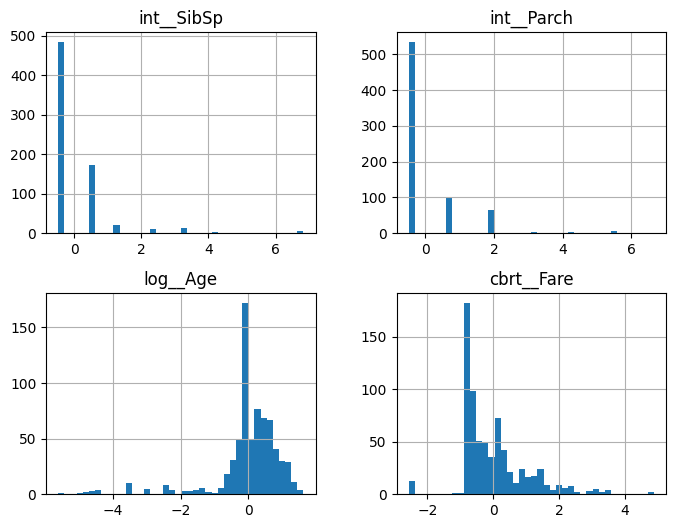

In [60]:
titanic_prepared_df[['int__SibSp', 'int__Parch', 'log__Age', 'cbrt__Fare']].hist(bins=40, figsize=(8,6))
plt.show()

In [61]:
# Check if our earlier manual implementation of preprocessing data identical to the one from the pipeline
# X : earlier manual implementation
# titanic_prepared: Implement using pipeline
if np.sum(titanic_prepared != X) == 0:
    print('Two implementation got an identical result of preprocessing data.')
else:
    print('There are something different between two implementations.')

There are something different between two implementations.


# 5. Select and Train a Model

In [62]:
# Seperate the fetures and the labels, and create a copy of training set
x_train = strat_train_set.drop(columns='Survived')
y_train = strat_train_set['Survived'].copy()

In [63]:
# Define a function used to validating the models by using k-fold cross-validation
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.base import clone

def evaluate(model, x_train, y_train, **kwargs):
    cloned_clf = clone(model)
    cv = kwargs['cv']
    method = kwargs['pred_method']
    cat = ['train', 'cv']
    score_labels = ['(Mean) Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score', 'fpr', 'tpr', 'thresholds']
    scores = {}
    for c in cat:
        # calculate y_pred, y_score, and accuracy
        if c == 'train':
            cloned_clf.fit(x_train, y_train)
            y_pred = cloned_clf.predict(x_train)
            if method == 'decision_function': y_scores = cloned_clf.decision_function(x_train)
            if method == 'predict_proba' : y_scores = cloned_clf.predict_proba(x_train)[:,1]
            acc = accuracy_score(y_train, y_pred)
        if c == 'cv':
            y_pred = cross_val_predict(model, x_train, y_train, cv=cv)
            if method == 'decision_function': y_scores = cross_val_predict(model, x_train, y_train, cv=cv, method='decision_function')
            if method == 'predict_proba': y_scores = cross_val_predict(model, x_train, y_train, cv=cv, method='predict_proba')[:,1]
            acc = np.mean(cross_val_score(model, x_train, y_train, cv=cv, scoring='accuracy'))

        # calculate precision, recall, f1
        precision, recall, f1 = precision_score(y_train, y_pred), recall_score(y_train, y_pred), f1_score(y_train, y_pred)

        # calculate roc_auc score, fpr, tpr, thresholds
        auc = roc_auc_score(y_train, y_scores)
        fpr, tpr, thresholds = roc_curve(y_train, y_scores)

        scores[c] = {k:v for k,v in zip(score_labels, [acc, precision, recall, f1, auc, fpr, tpr, thresholds])}

    scores_df = pd.DataFrame(scores).iloc[:-3, :].rename(columns={'train':'Training', 'cv':f'{cv}-fold Cross-Validation'}).round(5)

    return scores, scores_df

# Define a function for ploting ROC curve
def plot_roc(scores):
    train_fpr, train_tpr = scores[0]['train']['fpr'], scores[0]['train']['tpr']
    cv_fpr, cv_tpr = scores[0]['cv']['fpr'], scores[0]['cv']['tpr']
    fpr = [train_fpr, cv_fpr]
    tpr = [train_tpr, cv_tpr]
    title = ['ROC curve (Training)', 'ROC curve (Validation)']
    fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
    for i in range(2):
        ax[i].plot(fpr[i], tpr[i], linewidth=2, label='ROC curve')
        ax[i].plot([0,1], [0,1], 'k:', label='Random classifier\'s ROC curve')
        ax[i].set_xlabel('False Positive Rate (Fall-Out)')
        ax[i].set_ylabel('True Positive Rate (Recall)')
        ax[i].grid()
        ax[i].axis([0,1,0,1])
        ax[i].legend(loc='lower right', fontsize=13)
        ax[i].set_title(title[i])
    plt.tight_layout()
    plt.show()

## 5-1 Short-list Promising Models

### *Logistic Regression*

In [64]:
# Train a logistic regression model using standard parameters
from sklearn.linear_model import LogisticRegression

log_reg = make_pipeline(preprocessing, LogisticRegression(random_state=42))
log_reg.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('int',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['SibSp', 'Parch']),
                                                 ('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-...
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'cbrt'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('logisticregression', LogisticRegression(random_state=42))])

In [65]:
# Measure the performance of the model using different metrics on training set and validation set
log_reg_scores = evaluate(log_reg, x_train, y_train, cv=3, pred_method='decision_function')
log_reg_scores[1]

,Training,3-fold Cross-Validation
(Mean) Accuracy,0.814607,0.810328
Precision,0.789916,0.787234
Recall,0.696296,0.685185
F1 Score,0.740157,0.732673
AUC Score,0.865242,0.858417


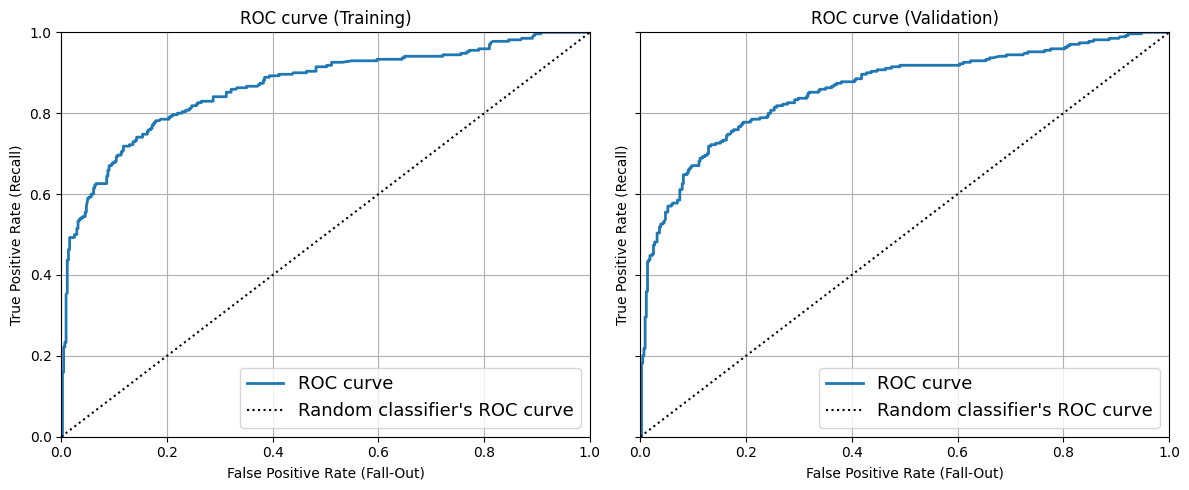

In [66]:
# ROC Curve for training and cross-validation
plot_roc(log_reg_scores)

### *Random Forests*

In [67]:
# Train a random Forests model using standard parameters
from sklearn.ensemble import RandomForestClassifier

forest_clf = make_pipeline(preprocessing, RandomForestClassifier(random_state=42))
forest_clf.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('int',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['SibSp', 'Parch']),
                                                 ('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-...
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'cbrt'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [68]:
# Measure the performance of the model using different metrics on training set and validation set
forest_clf_scores = evaluate(forest_clf, x_train, y_train, cv=3, pred_method='predict_proba')
forest_clf_scores[1]

,Training,3-fold Cross-Validation
(Mean) Accuracy,0.984551,0.790678
Precision,0.985019,0.728302
Recall,0.974074,0.714815
F1 Score,0.979516,0.721495
AUC Score,0.997922,0.846171


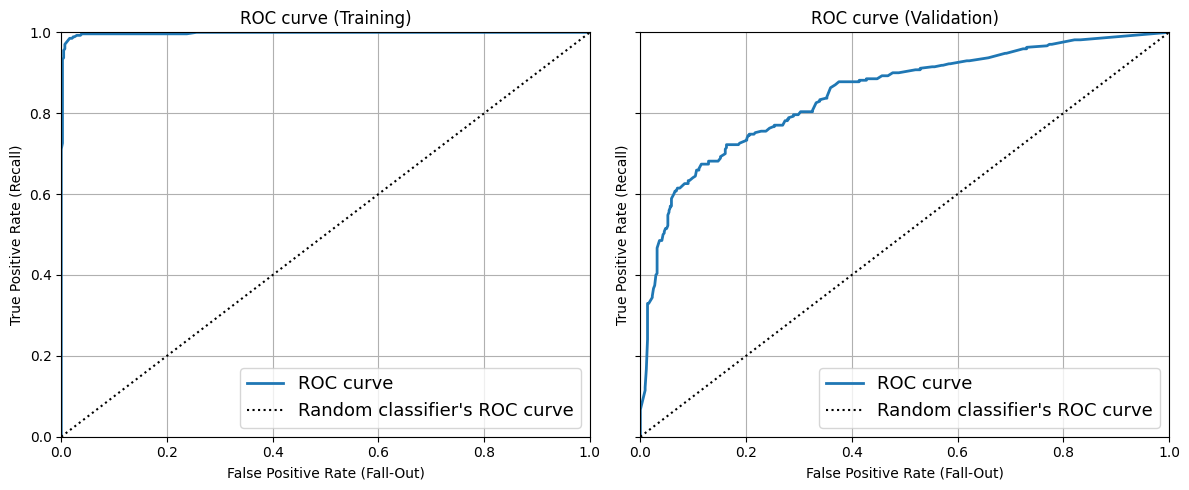

In [69]:
# ROC Curve for training and cross-validation
plot_roc(forest_clf_scores)

### *Gradient Boosted Trees*

In [70]:
# Train a gradient boosted trees model using standard parameters
from sklearn.ensemble import GradientBoostingClassifier

gbdt_clf = make_pipeline(preprocessing, GradientBoostingClassifier(random_state=42))
gbdt_clf.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('int',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['SibSp', 'Parch']),
                                                 ('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-...
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'cbrt'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=42))])

In [71]:
# Measure the performance of the model using different metrics on training set and validation set
gbdt_clf_scores = evaluate(gbdt_clf, x_train, y_train, cv=3, pred_method='decision_function')
gbdt_clf_scores[1]

,Training,3-fold Cross-Validation
(Mean) Accuracy,0.898876,0.813158
Precision,0.915966,0.784232
Recall,0.807407,0.7
F1 Score,0.858268,0.739726
AUC Score,0.957072,0.861371


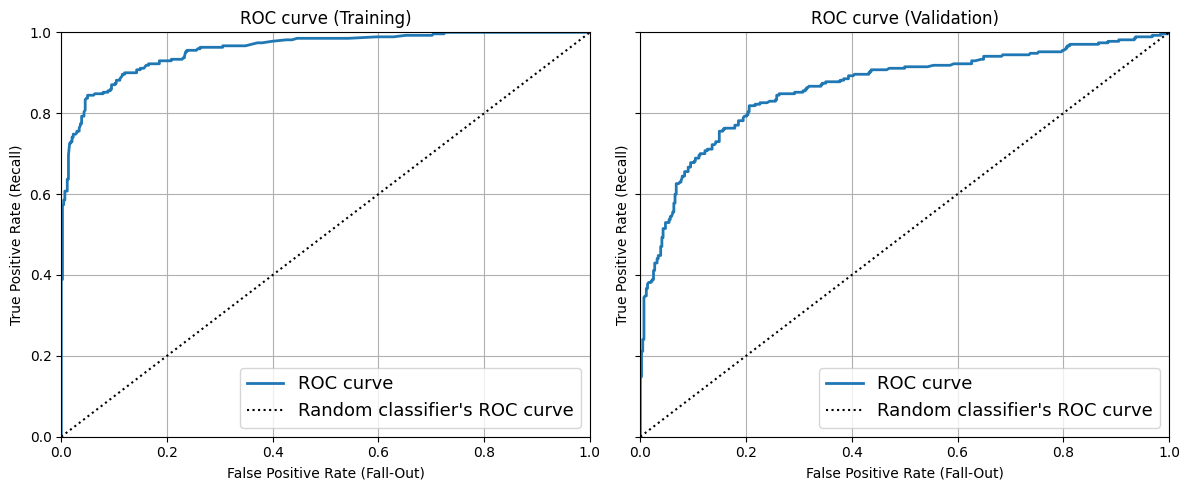

In [72]:
# ROC Curve for training and cross-validation
plot_roc(gbdt_clf_scores)

## 5-2 Fine-Tune The Models *(Hyperparameter Tuning)*

In [73]:
# Import function used for hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform

### *Fine-Tuning Logistic Regression Model*

In [74]:
# Hyperparameter tuning using GridSearchCV
# Using roc_auc as the metric for choosing the best model (refit = 'roc_auc')

# Full pipeline
log_reg_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('log_reg', LogisticRegression(random_state=42))
])

# Parameter grid
log_reg_param_grid = [
    {
        'log_reg__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky'],
        'log_reg__penalty':['l2'],
        'log_reg__C': [100, 10, 1.0, 0.1, 0.01],
        'log_reg__max_iter': [100, 1000, 2500, 5000]
    }
]

# Fine-Tuning the model
log_reg_grid_search = GridSearchCV(log_reg_pipeline, log_reg_param_grid, cv=3, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], refit='roc_auc', n_jobs=-1, verbose=True)
log_reg_grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('int',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['SibSp',
                                                                          'Parch']),
                                                                        ('log',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(fe...
                                                                          'Sex',
                                                                          'Embarked'])])),
                                       ('log_reg',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'log_reg__C': [100, 10, 1.0, 0.1, 0.01],
                          'log_reg__max_iter': [100, 1000, 2500, 5000],
                          'log_reg__penalty': ['l2'],
                          'log_reg__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                              'newton-cholesky']}],
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
             verbose=True)

In [75]:
# Report the tuning result, and the best model with its set of parameters and scores
log_reg_cv_res = pd.DataFrame(log_reg_grid_search.cv_results_)
selected_columns = ['param_log_reg__C', 'param_log_reg__max_iter', 'param_log_reg__solver', 'param_log_reg__penalty','mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1', 'mean_test_roc_auc']
display(log_reg_cv_res[selected_columns].sort_values(by=['mean_test_roc_auc', 'mean_test_f1'], ascending=False).head())
print(f'''
Best Index: {log_reg_grid_search.best_index_}
Best Parameters: {log_reg_grid_search.best_params_}
Best AUC Score: {log_reg_grid_search.best_score_}''')

,param_log_reg__C,param_log_reg__max_iter,param_log_reg__solver,param_log_reg__penalty,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1,mean_test_roc_auc
49,0.1,100,liblinear,l2,0.810339,0.806832,0.659259,0.724204,0.860395
53,0.1,1000,liblinear,l2,0.810339,0.806832,0.659259,0.724204,0.860395
57,0.1,2500,liblinear,l2,0.810339,0.806832,0.659259,0.724204,0.860395
61,0.1,5000,liblinear,l2,0.810339,0.806832,0.659259,0.724204,0.860395
50,0.1,100,newton-cg,l2,0.810339,0.806832,0.659259,0.724204,0.860169



Best Index: 49
Best Parameters: {'log_reg__C': 0.1, 'log_reg__max_iter': 100, 'log_reg__penalty': 'l2', 'log_reg__solver': 'liblinear'}
Best AUC Score: 0.860394578251721


In [76]:
# Gain the best model from gridsearchCV using 'best_estimator_' attribute
# The model is already fitted with all training data (x_train, y_train) using the best hyperparameters, since we set the 'refit' hyperpameter to 'roc_auc' in GridSearchCV
log_reg_final = log_reg_grid_search.best_estimator_
log_reg_final

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('int',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['SibSp', 'Parch']),
                                                 ('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one'...
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'cbrt'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('log_reg',
                 LogisticRegression(C=0.1, random_state=42,
                                    solver='liblinear'))])

In [77]:
# Gain the logistic regression model's parameters
print(f'''
Weight Parameters: {log_reg_final['log_reg'].coef_}

Bias Parameter: {log_reg_final['log_reg'].intercept_}''')


Weight Parameters: [[-0.44482349 -0.16703523 -0.50945852  0.40856132  0.51561387  0.15341343
  -0.66383667  1.0623912  -1.05720057  0.15655293  0.02097167 -0.17233397]]

Bias Parameter: [0.00519063]


In [78]:
# Measure the performance of the model using different metrics on training set and validation set
log_reg_scores_final = evaluate(log_reg_final, x_train, y_train, cv=3, pred_method='decision_function')
log_reg_scores_final[1]

,Training,3-fold Cross-Validation
(Mean) Accuracy,0.817416,0.810339
Precision,0.799145,0.80543
Recall,0.692593,0.659259
F1 Score,0.742063,0.725051
AUC Score,0.864438,0.859104


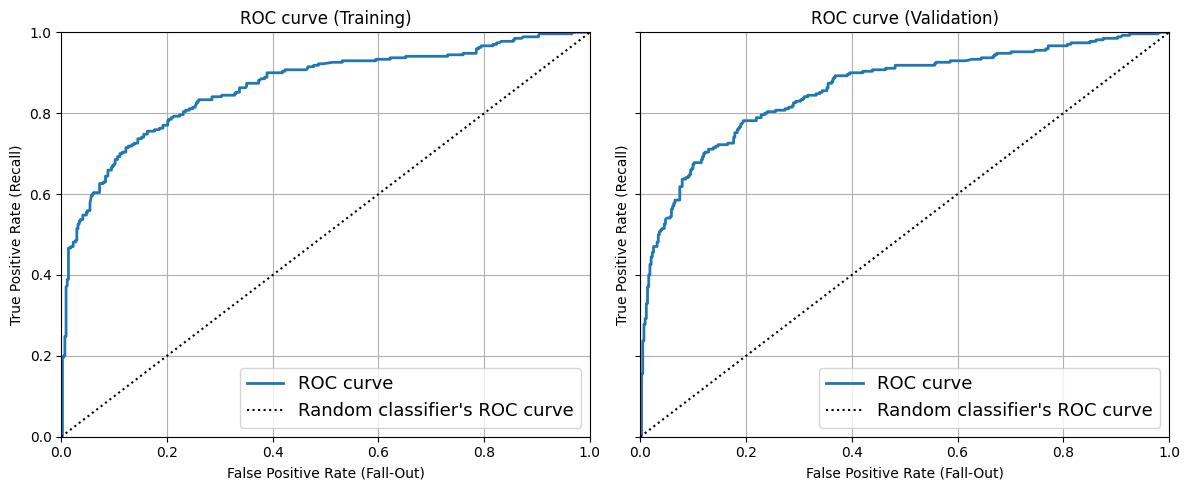

In [79]:
# ROC Curve for training and cross-validation
plot_roc(log_reg_scores_final)

### *Fine-Tuning Random Forests Model*

In [80]:
# Hyperparameter tuning using RandomizedSearchCV
# Using roc_auc as the metric for choosing the best model (refit = 'roc_auc')

# Full pipeline
forest_clf_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('forest_clf', RandomForestClassifier(random_state=42, criterion='entropy', bootstrap=True))
])

## Tree-Specific Parameters
max_depth = randint(low=1, high=50)
min_samples_split = randint(low=2, high=20)
min_samples_leaf = randint(low=1, high=10)
max_features = ['sqrt', 'log2']
max_leaf_nodes = randint(low=2, high=1000)

## Ensemble Model Parameters
n_estimators = randint(low=10, high=1000)

# Parameter distribution
forest_clf_param_dist = [
    {
        'forest_clf__max_depth': max_depth,
        'forest_clf__min_samples_split': min_samples_split,
        'forest_clf__min_samples_leaf': min_samples_leaf,
        'forest_clf__max_features': max_features,
        'forest_clf__max_leaf_nodes': max_leaf_nodes,
        'forest_clf__n_estimators': n_estimators,
    }
]

# Fine-tuning the model
forest_clf_rnd_search = RandomizedSearchCV(forest_clf_pipeline, param_distributions=forest_clf_param_dist,
                               n_iter=100, cv=3, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                               random_state=42, refit='roc_auc', n_jobs=-1, verbose=True)

forest_clf_rnd_search.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('int',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['SibSp',
                                                                                'Parch']),
                                                                              ('log',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransfor...
                                         'forest_clf__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d51eebbf810>,
                                         'forest_clf__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d51eebbd210>,
                                         'forest_clf__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d51f123f710>}],
                   random_state=42, refit='roc_auc',
                   scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                   verbose=True)

In [81]:
# Report the tuning result, and the best model with its set of parameters and scores
forest_clf_cv_res = pd.DataFrame(forest_clf_rnd_search.cv_results_)
selected_columns = ['param_forest_clf__max_depth', 'param_forest_clf__min_samples_split', 'param_forest_clf__min_samples_leaf',
                    'param_forest_clf__max_features', 'param_forest_clf__max_leaf_nodes', 'param_forest_clf__n_estimators',
                    'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1', 'mean_test_roc_auc']
display(forest_clf_cv_res[selected_columns].sort_values(by=['mean_test_roc_auc', 'mean_test_f1'], ascending=False).head())
print(f'''
Best Index: {forest_clf_rnd_search.best_index_}
Best Parameters: {forest_clf_rnd_search.best_params_}
Best AUC Score: {forest_clf_rnd_search.best_score_}''')

,param_forest_clf__max_depth,param_forest_clf__min_samples_split,param_forest_clf__min_samples_leaf,param_forest_clf__max_features,param_forest_clf__max_leaf_nodes,param_forest_clf__n_estimators,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1,mean_test_roc_auc
92,43,19,2,log2,286,44,0.814559,0.802661,0.677778,0.731962,0.867511
66,47,11,2,log2,664,395,0.810333,0.788012,0.681481,0.729588,0.867348
11,29,11,2,sqrt,403,967,0.814553,0.798700,0.681481,0.733821,0.866396
7,18,10,2,log2,602,355,0.813140,0.794917,0.681481,0.732597,0.866114
13,40,16,2,sqrt,721,62,0.815959,0.806766,0.677778,0.733797,0.866099



Best Index: 92
Best Parameters: {'forest_clf__max_depth': 43, 'forest_clf__max_features': 'log2', 'forest_clf__max_leaf_nodes': 286, 'forest_clf__min_samples_leaf': 2, 'forest_clf__min_samples_split': 19, 'forest_clf__n_estimators': 44}
Best AUC Score: 0.8675109633442967


In [82]:
# Gain the best model from RandomizedSearchCV using 'best_estimator_' attribute
# The model is already fitted with all training data (x_train, y_train) using the best hyperparameters, since we set the 'refit' hyperpameter to 'roc_auc' in RandomizedSearchCV
forest_clf_final = forest_clf_rnd_search.best_estimator_
forest_clf_final

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('int',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['SibSp', 'Parch']),
                                                 ('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one'...
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('forest_clf',
                 RandomForestClassifier(criterion='entropy', max_depth=43,
                                        max_features='log2', max_leaf_nodes=286,
                                        min_samples_leaf=2,
                                        min_samples_split=19, n_estimators=44,
                                        random_state=42))])

In [83]:
# Inspecting the best random forests model by indicating the realtive importance of each feature
preprocessing.fit(x_train)
columns = preprocessing.get_feature_names_out()
for score, name in sorted(zip(forest_clf_final['forest_clf'].feature_importances_, columns), reverse=True):
    print(round(score, 2), name)

0.2 cat__Sex_male
0.19 cat__Sex_female
0.18 cbrt__Fare
0.16 log__Age
0.07 cat__Pclass_3
0.06 cat__Pclass_1
0.04 int__SibSp
0.03 int__Parch
0.03 cat__Pclass_2
0.02 cat__Embarked_C
0.02 cat__Embarked_S
0.01 cat__Embarked_Q


In [84]:
# Measure the performance of the model using different metrics on training set and validation set
forest_clf_scores_final = evaluate(forest_clf_final, x_train, y_train, cv=3, pred_method='predict_proba')
forest_clf_scores_final[1]

,Training,3-fold Cross-Validation
(Mean) Accuracy,0.870787,0.814559
Precision,0.886957,0.802632
Recall,0.755556,0.677778
F1 Score,0.816,0.73494
AUC Score,0.93904,0.867119


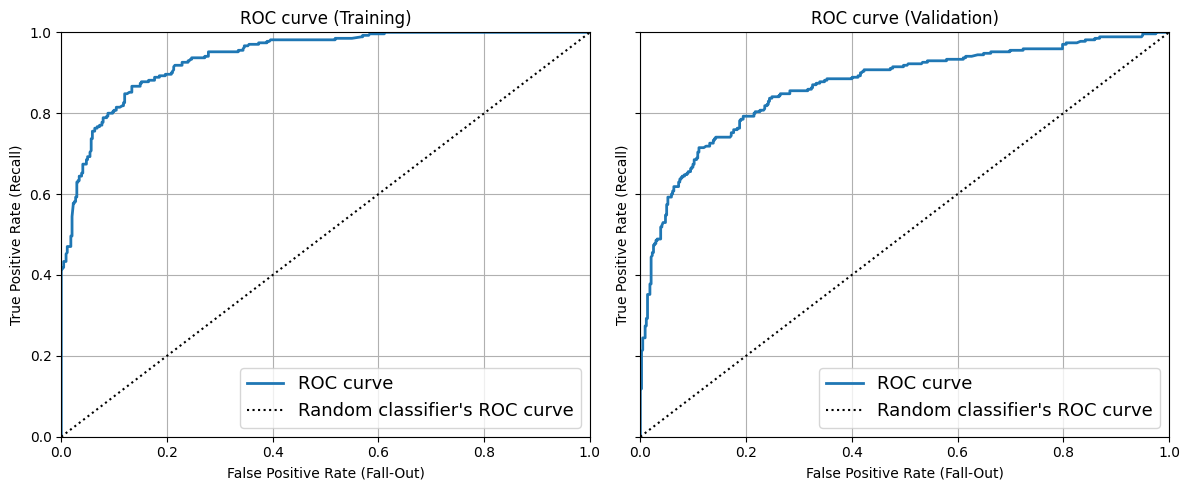

In [85]:
# ROC Curve for training and cross-validation
plot_roc(forest_clf_scores_final)

### *Fine-Tuning Gradient Boosted Trees*

In [86]:
# Hyperparameter tuning using RandomizedSearchCV
# Using roc_auc as the metric for choosing the best model (refit = 'roc_auc')

# Full pipeline
gbdt_clf_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('gbdt_clf', GradientBoostingClassifier(random_state=42))
])

## Tree-Specific Parameters
max_depth = randint(low=1, high=10)
min_samples_split = randint(low=2, high=10)
min_samples_leaf = randint(low=1, high=5)
max_features = ['sqrt', 'log2']
max_leaf_nodes = randint(low=2, high=100)

## Ensemble Model Parameters
n_estimators = randint(low=50, high=500)

## Boosting Parameters
learning_rate = uniform(0.01, 0.1)

# Parameter distribution
gbdt_clf_param_dist = [
    {
        'gbdt_clf__max_depth': max_depth,
        'gbdt_clf__min_samples_split': min_samples_split,
        'gbdt_clf__min_samples_leaf': min_samples_leaf,
        'gbdt_clf__max_features': max_features,
        'gbdt_clf__max_leaf_nodes': max_leaf_nodes,
        'gbdt_clf__n_estimators': n_estimators,
        'gbdt_clf__learning_rate': learning_rate
    }
]

# Fine-Tuning the model
gbdt_clf_rnd_search = RandomizedSearchCV(gbdt_clf_pipeline, param_distributions=gbdt_clf_param_dist,
                               n_iter=100, cv=3, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                               random_state=42, refit='roc_auc', n_jobs=-1, verbose=True)

gbdt_clf_rnd_search.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('int',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['SibSp',
                                                                                'Parch']),
                                                                              ('log',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransfor...
                                         'gbdt_clf__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d51ee5f8410>,
                                         'gbdt_clf__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d51ee5f8b10>,
                                         'gbdt_clf__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d51eeb835d0>}],
                   random_state=42, refit='roc_auc',
                   scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                   verbose=True)

In [87]:
# Report the tuning result, and the best model with its set of parameters and scores
gbdt_clf_cv_res = pd.DataFrame(gbdt_clf_rnd_search.cv_results_)
selected_columns = ['param_gbdt_clf__max_depth', 'param_gbdt_clf__min_samples_split', 'param_gbdt_clf__min_samples_leaf',
                    'param_gbdt_clf__max_features','param_gbdt_clf__max_leaf_nodes', 'param_gbdt_clf__n_estimators', 'param_gbdt_clf__learning_rate',
                    'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1', 'mean_test_roc_auc']
display(gbdt_clf_cv_res[selected_columns].sort_values(by=['mean_test_roc_auc', 'mean_test_f1'], ascending=False).head())
print(f'''
Best Index: {gbdt_clf_rnd_search.best_index_}
Best Parameters: {gbdt_clf_rnd_search.best_params_}
Best AUC Score: {gbdt_clf_rnd_search.best_score_}''')

,param_gbdt_clf__max_depth,param_gbdt_clf__min_samples_split,param_gbdt_clf__min_samples_leaf,param_gbdt_clf__max_features,param_gbdt_clf__max_leaf_nodes,param_gbdt_clf__n_estimators,param_gbdt_clf__learning_rate,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1,mean_test_roc_auc
18,5,2,3,sqrt,79,54,0.057221,0.813158,0.795989,0.681481,0.733298,0.865298
62,5,5,1,sqrt,9,157,0.046019,0.824386,0.824683,0.681481,0.745424,0.864028
23,2,2,2,log2,46,183,0.026122,0.811734,0.786981,0.688889,0.734508,0.863693
59,3,3,4,sqrt,16,371,0.017094,0.815977,0.803906,0.681481,0.736159,0.862450
78,2,2,3,sqrt,36,139,0.029579,0.810339,0.786604,0.685185,0.732354,0.861772



Best Index: 18
Best Parameters: {'gbdt_clf__learning_rate': 0.05722149251619493, 'gbdt_clf__max_depth': 5, 'gbdt_clf__max_features': 'sqrt', 'gbdt_clf__max_leaf_nodes': 79, 'gbdt_clf__min_samples_leaf': 3, 'gbdt_clf__min_samples_split': 2, 'gbdt_clf__n_estimators': 54}
Best AUC Score: 0.8652981212505022


In [88]:
# Gain the best model from RandomizedSearchCV using 'best_estimator_' attribute
# The model is already fitted with all training data (x_train, y_train) using the best hyperparameters, since we set the 'refit' hyperpameter to 'roc_auc' in RandomizedSearchCV
gbdt_clf_final = gbdt_clf_rnd_search.best_estimator_
gbdt_clf_final

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('int',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['SibSp', 'Parch']),
                                                 ('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one'...
                                                  ['Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('gbdt_clf',
                 GradientBoostingClassifier(learning_rate=0.05722149251619493,
                                            max_depth=5, max_features='sqrt',
                                            max_leaf_nodes=79,
                                            min_samples_leaf=3, n_estimators=54,
                                            random_state=42))])

In [89]:
# Inspecting the best gbdt model by indicating the realtive importance of each feature
preprocessing.fit(x_train)
columns = preprocessing.get_feature_names_out()
for score, name in sorted(zip(gbdt_clf_final['gbdt_clf'].feature_importances_, columns), reverse=True):
    print(round(score, 2), name)

0.26 cat__Sex_female
0.2 cbrt__Fare
0.16 cat__Sex_male
0.13 log__Age
0.08 cat__Pclass_3
0.06 int__SibSp
0.03 cat__Pclass_1
0.03 int__Parch
0.02 cat__Pclass_2
0.01 cat__Embarked_S
0.01 cat__Embarked_C
0.0 cat__Embarked_Q


In [90]:
# Measure the performance of the model using different metrics on training set and validation set
gbdt_clf_scores_final = evaluate(gbdt_clf_final, x_train, y_train, cv=3, pred_method='decision_function')
gbdt_clf_scores_final[1]

,Training,3-fold Cross-Validation
(Mean) Accuracy,0.880618,0.813158
Precision,0.887029,0.796537
Recall,0.785185,0.681481
F1 Score,0.833006,0.734531
AUC Score,0.938524,0.861425


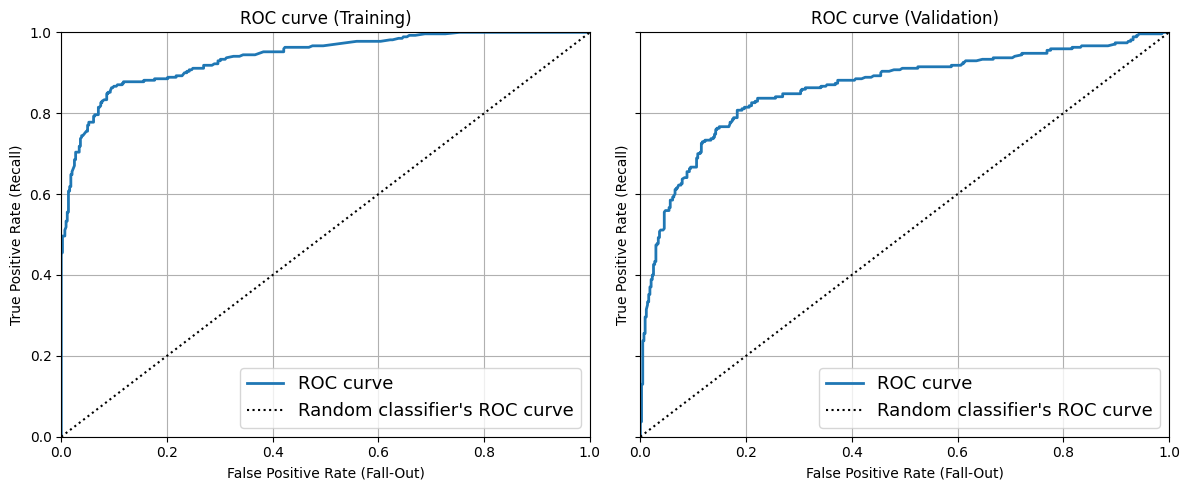

In [91]:
# ROC Curve for training and cross-validation
plot_roc(gbdt_clf_scores_final)

## 5-3 Compare Optimized Models and Select the Best Model

In [92]:
# Compare cross-validation scores of each promising model
metrics = ['mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1', 'mean_test_roc_auc']
log_reg_best  = log_reg_cv_res.loc[log_reg_grid_search.best_index_, metrics]
forest_clf_best = forest_clf_cv_res.loc[forest_clf_rnd_search.best_index_, metrics]
gbdt_clf_best = gbdt_clf_cv_res.loc[gbdt_clf_rnd_search.best_index_, metrics]
compare_cv_scores = pd.DataFrame(data=[log_reg_best, forest_clf_best, gbdt_clf_best], index=['Logistic Regression', 'Random Forests', 'Gradient Boosted Trees']).rename(columns={
    'mean_test_accuracy': 'mean_cv_accuracy',
    'mean_test_precision': 'mean_cv_precision',
    'mean_test_recall': 'mean_cv_recall',
    'mean_test_f1': 'mean_cv_f1',
    'mean_test_roc_auc': 'mean_cv_roc_auc'
})
compare_cv_scores

,mean_cv_accuracy,mean_cv_precision,mean_cv_recall,mean_cv_f1,mean_cv_roc_auc
Logistic Regression,0.810339,0.806832,0.659259,0.724204,0.860395
Random Forests,0.814559,0.802661,0.677778,0.731962,0.867511
Gradient Boosted Trees,0.813158,0.795989,0.681481,0.733298,0.865298


As we utilized the ROC AUC score and F1 score as the metric for selecting the best model, I will opt for the ***Gradient Boosted Trees*** model as the best choice.

In [93]:
# Gradient Boosted Trees Model
gbdt_clf_final

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('int',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['SibSp', 'Parch']),
                                                 ('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one'...
                                                  ['Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('gbdt_clf',
                 GradientBoostingClassifier(learning_rate=0.05722149251619493,
                                            max_depth=5, max_features='sqrt',
                                            max_leaf_nodes=79,
                                            min_samples_leaf=3, n_estimators=54,
                                            random_state=42))])

## 5-4 Evaluate the Model on the Test Set *(Generalization Error)*

In [94]:
# Seperate the fetures and the labels, and create a copy of test set
x_test = strat_test_set.drop(columns='Survived')
y_test = strat_test_set['Survived'].copy()

In [95]:
# Final y_pred and y_scores form test set
final_predictions = gbdt_clf_final.predict(x_test)
final_scores = gbdt_clf_final.decision_function(x_test)

In [96]:
# Generalization Error
test_accuracy = accuracy_score(y_test, final_predictions)
test_precision = precision_score(y_test, final_predictions)
test_recall = recall_score(y_test, final_predictions)
test_f1 = f1_score(y_test, final_predictions)
test_roc_auc = roc_auc_score(y_test, final_scores)

print(f'''
Test Accuracy Score: {test_accuracy:.5f}
Test Precision Score: {test_precision:.5f}
Test Recall Score: {test_recall:.5f}
Test F1 Score: {test_f1:.5f}
Test ROC AUC Score: {test_roc_auc:.5f}
''')


Test Accuracy Score: 0.81564
Test Precision Score: 0.80000
Test Recall Score: 0.72222
Test F1 Score: 0.75912
Test ROC AUC Score: 0.87656



# 6. Make Predictions on Test Set

In [97]:
# test_set for kaggle prediction
x_test_final = test_set_final.copy()

In [98]:
# Final prediction form kaggle test set
kaggle_predictions = gbdt_clf_final.predict(x_test_final)

In [99]:
# prediction dataframe
kaggle_predictions_df = pd.DataFrame({
    'PassengerId': x_test_final['PassengerId'],
    'Survived': kaggle_predictions
})

kaggle_predictions_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
